### Initialization

In [1]:
%load_ext autoreload
%autoreload 2
import data_postprocessing as dpp
eegData = dpp.eegData(path='Sams')

### eegData object 

##### Load and clean all data sets 

In [34]:
# can try removing more or fewer channels in code to see what happens with spectrogram noise and ML performance
eegData.load_clean_all_data()

Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-1.2-22-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (1.651 sec)

removing first 2 seconds
Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-2.2-22-2021_raw.fif.gz...
    Range : 0 ... 4418

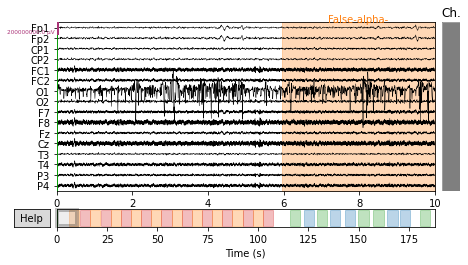

In [21]:
_ = eegData.data.plot(scalings=100)

Sam's todo:

##### Load and Clean One Dataset 

In [18]:
# eegData.load_clean_one_dataset(r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\second_try\BCIproject_trial-S-2.3-8-2021_raw.fif.gz", standardize=True)
eegData.load_clean_one_dataset(r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\second_try\BCIproject_trial-S-4.5-14-2021_raw.fif.gz", standardize=False)


no epochs found for .*-TMI-a
no epochs found for .*-TMI-i
no epochs found for .*-LMI-a
no epochs found for .*-LMI-i
no epochs found for True-TMI-a-
no epochs found for False-TMI-a-
no epochs found for True-TMI-i-
no epochs found for False-TMI-i-
no epochs found for True-LMI-a-
no epochs found for False-LMI-a-


In [6]:
eegData.annotation_descriptions

<Annotations | 30 segments: False-SSVEP- (5), False-alpha- (10), True- ...>

In [6]:
eegData.create_alpha_spectrograms()  # gets called from plot_all_alpha_specs if not already done

Used Annotations descriptions: ['True-alpha-']
2 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 2 events and 5001 original time points ...
0 bad epochs dropped
true_found is: True


False Alpha : 0


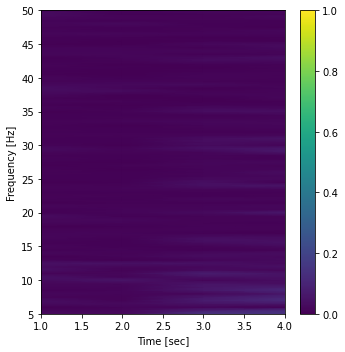

False Alpha : 1


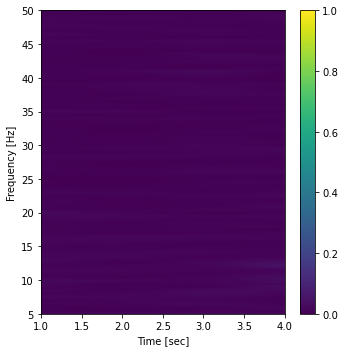

False Alpha : 2


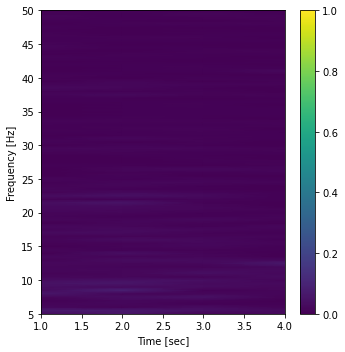

False Alpha : 3


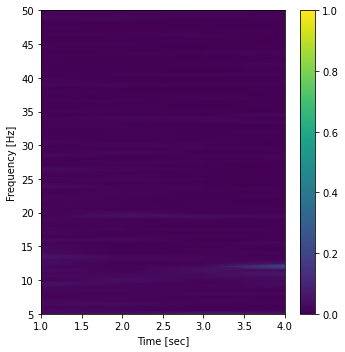

False Alpha : 4


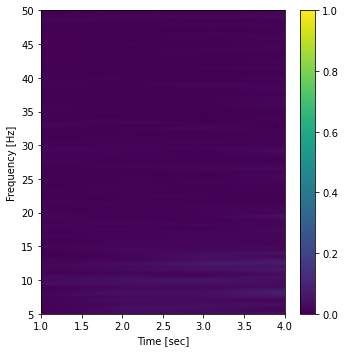

False Alpha : 5


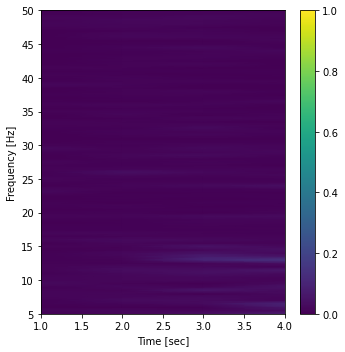

False Alpha : 6


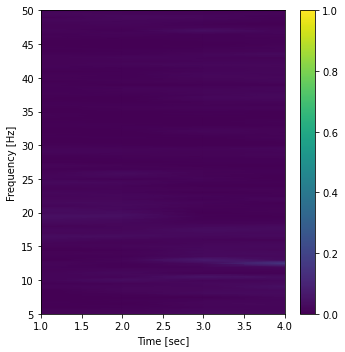

False Alpha : 7


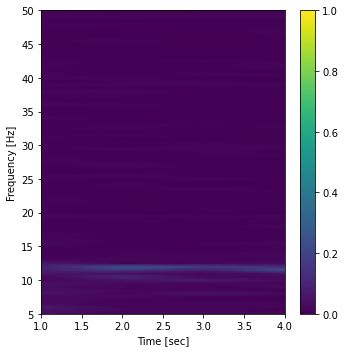

False Alpha : 8


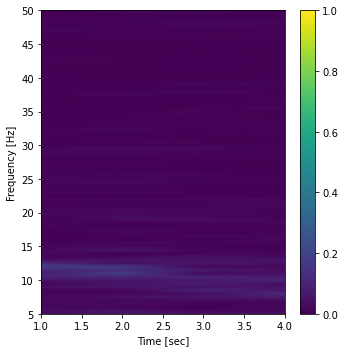

False Alpha : 9


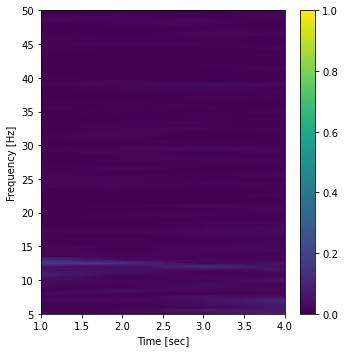

True Alpha : 0


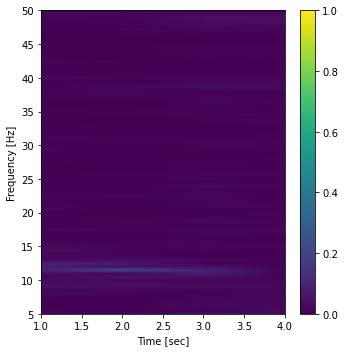

True Alpha : 1


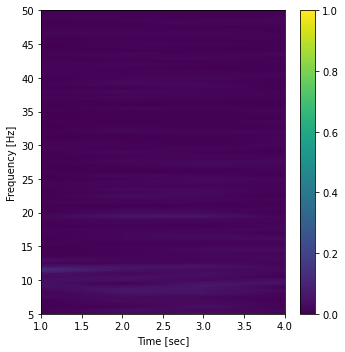

True Alpha : 2


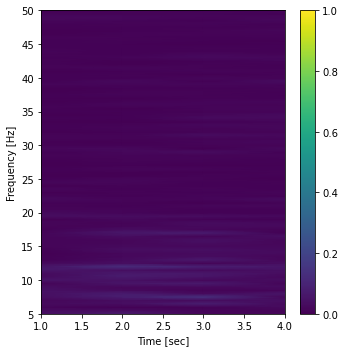

True Alpha : 3


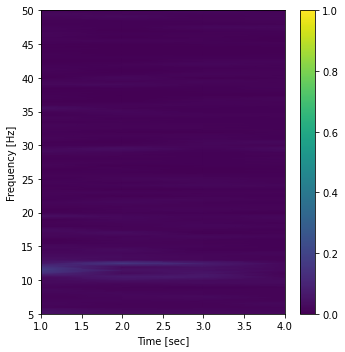

True Alpha : 4


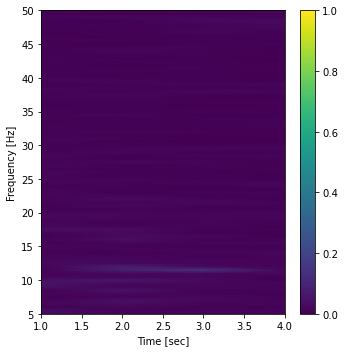

True Alpha : 5


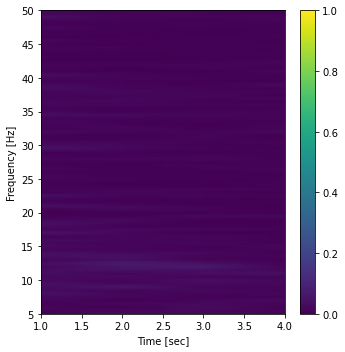

True Alpha : 6


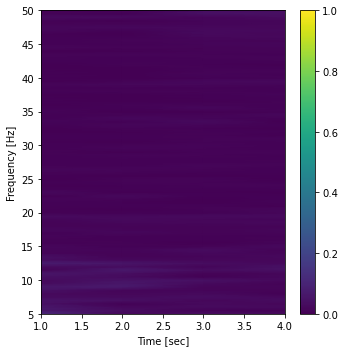

True Alpha : 7


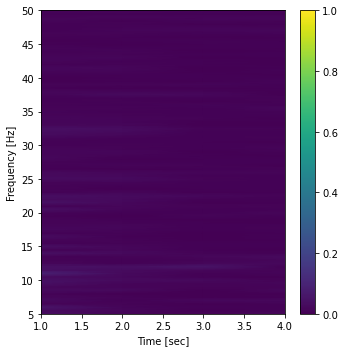

True Alpha : 8


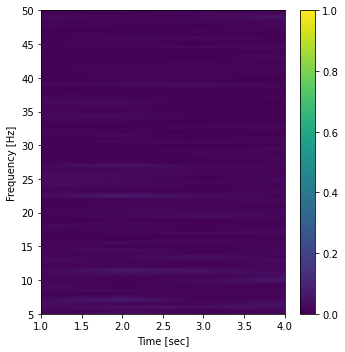

True Alpha : 9


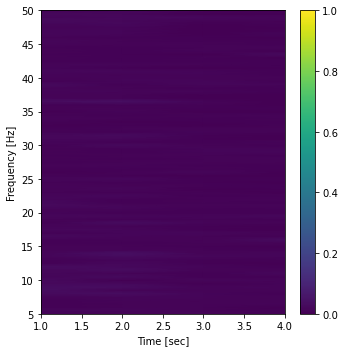

In [9]:
eegData.plot_all_alpha_spectrograms(vmax=1)

In [33]:
eegData.create_SSVEP_spectrograms()  # gets called from plot_all_ssvep_specs if not already done

Used Annotations descriptions: ['False-SSVEP-']
1 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 1 events and 5001 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['True-SSVEP-']
1 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 1 events and 5001 original time points ...
0 bad epochs dropped
true_found is: True


False SSVEP : 0


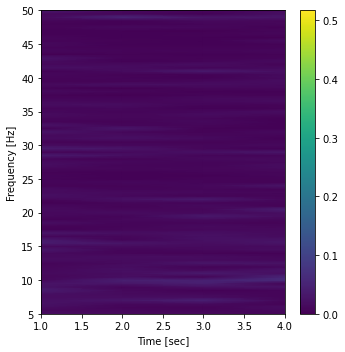

False SSVEP : 1


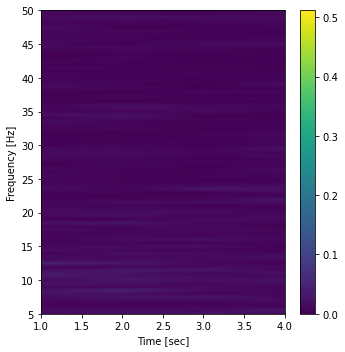

False SSVEP : 2


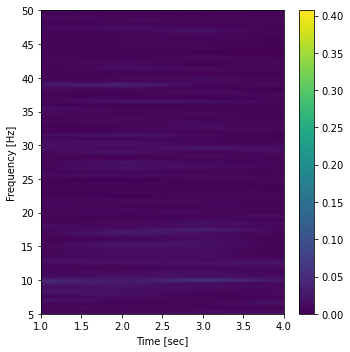

False SSVEP : 3


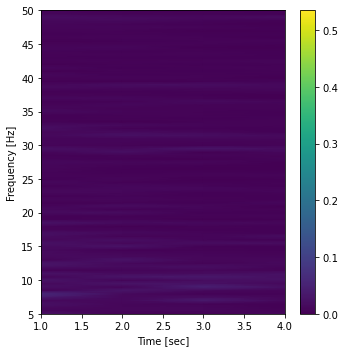

False SSVEP : 4


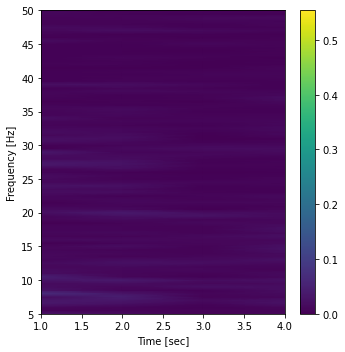

True SSVEP : 0


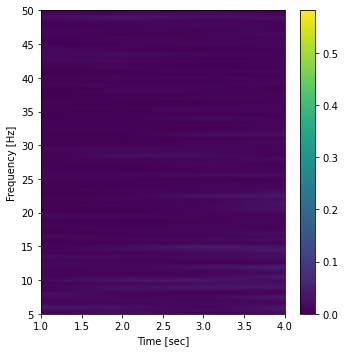

True SSVEP : 1


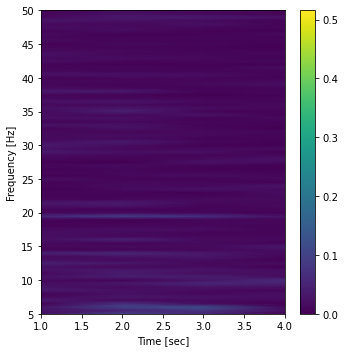

True SSVEP : 2


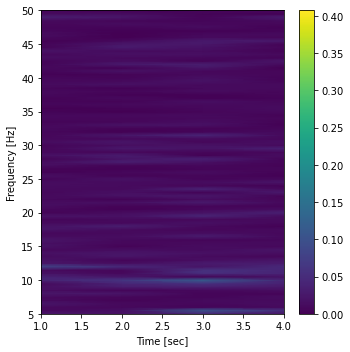

True SSVEP : 3


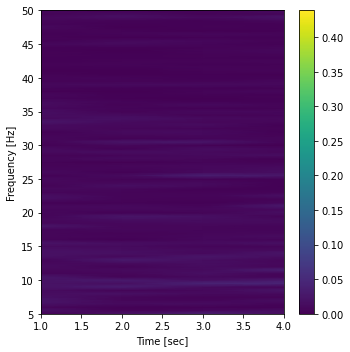

True SSVEP : 4


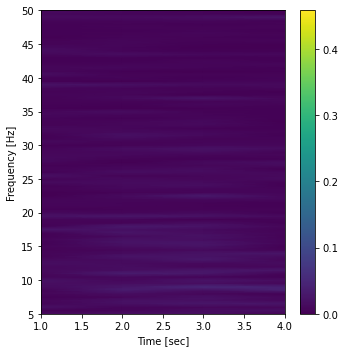

In [11]:
eegData.plot_all_SSVEP_spectrograms(vmax=None)

False SSVEP : 0


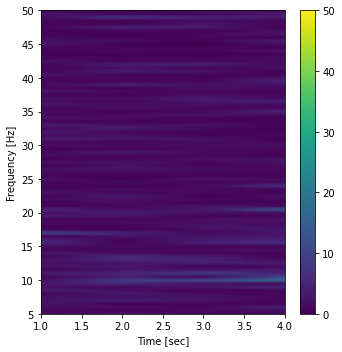

False SSVEP : 1


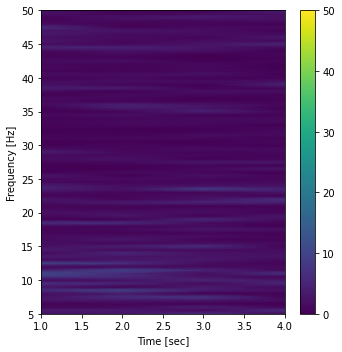

False SSVEP : 2


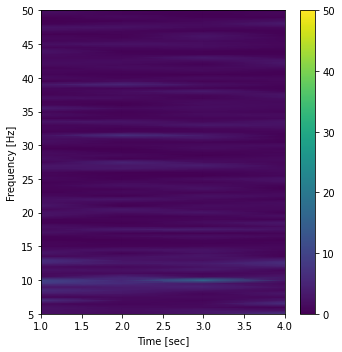

False SSVEP : 3


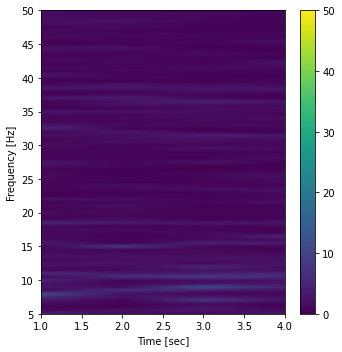

False SSVEP : 4


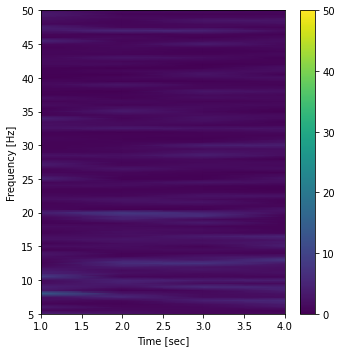

True SSVEP : 0


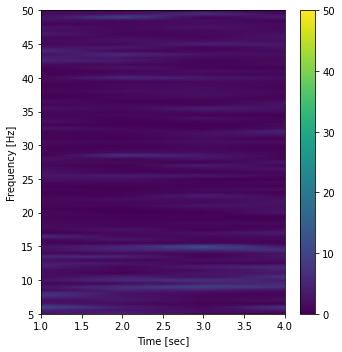

True SSVEP : 1


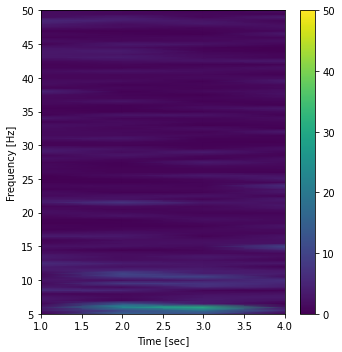

True SSVEP : 2


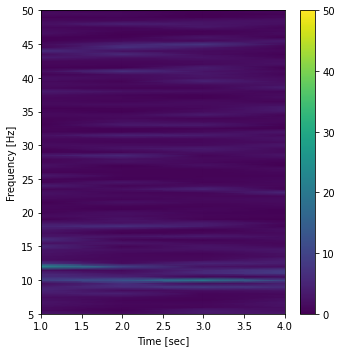

True SSVEP : 3


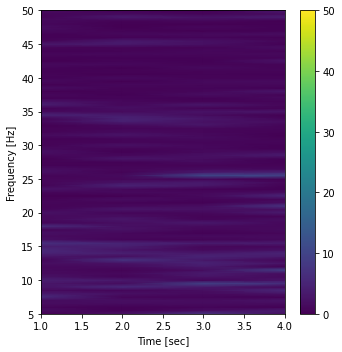

True SSVEP : 4


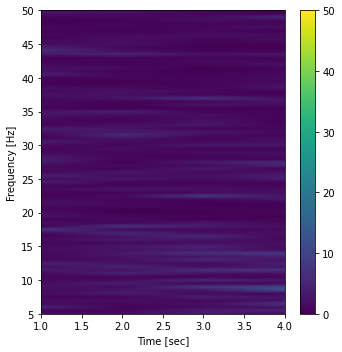

In [23]:
eegData.create_SSVEP_spectrograms(channels=['O2', 'P3'])
eegData.plot_all_SSVEP_spectrograms(vmax=50, channels=['O2', 'P4'])

In [ ]:
eegData.prepare_SSVEP_data_for_ml()
                                  #use pycaret to optimize parameters
                                  #from pycaret.classsification import setup, compare_models, save_model
                                  #df = pd.DataFrame(features)
                                    #     df['target'] = train_targets

                                    #     setup(df, target='target')
                                    #     best_model = compare_models()



4


IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:44:45
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
0,Categorical
1,Categorical
2,Categorical
3,Categorical
4,Categorical
...,...
997,Categorical
998,Categorical
999,Categorical
1000,Categorical


In [24]:
eegData.best_model

<function pycaret.classification.save_model(model, model_name: str, model_only: bool = False, verbose: bool = True)>

In [ ]:
eegData.fit_SSVEP_ML_and_report()

Nate's todo:

In [ ]:
eegData.fit_motor_imagery_and_report()
eegData.fit_motor_actual_and_report()
eegData.fit_laryngeal_imagery_and_report()
eegData.fit_laryngeal_actual_and_report()


# functions for making figures
# eegData.raw_data_figure()
# eegData.alpha_wave_figure()
# eegData.SSVEP_figure()
eegData.motor_spectrogram_figures()  # one for actual, one for imagery
eegData.laryngeal_spectrogram_figures()  # one for actual, one for imagery
eegData.csp_figures()  # MI, MA, LI, LA CSP figures